In [2]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Import the .root file
file = uproot.open("/tf/sigfcc_350.root")
# Check the file
print(file.keys())

['ProcessID0;1', 'ProcessID1;1', 'Delphes;1']


In [5]:
# Open the tree Delphes, which contains the necessary information of the simulation
tree = file["Delphes"]

# tree.show() 

In [6]:
# Check the keys of the tree so you can know what are you going to work with
tree.keys()

['Event',
 'Event/Event.fUniqueID',
 'Event/Event.fBits',
 'Event/Event.Number',
 'Event/Event.ReadTime',
 'Event/Event.ProcTime',
 'Event/Event.ProcessID',
 'Event/Event.MPI',
 'Event/Event.Weight',
 'Event/Event.CrossSection',
 'Event/Event.CrossSectionError',
 'Event/Event.Scale',
 'Event/Event.AlphaQED',
 'Event/Event.AlphaQCD',
 'Event/Event.ID1',
 'Event/Event.ID2',
 'Event/Event.X1',
 'Event/Event.X2',
 'Event/Event.ScalePDF',
 'Event/Event.PDF1',
 'Event/Event.PDF2',
 'Event_size',
 'Weight',
 'Weight/Weight.fUniqueID',
 'Weight/Weight.fBits',
 'Weight/Weight.Weight',
 'Weight_size',
 'Particle',
 'Particle/Particle.fUniqueID',
 'Particle/Particle.fBits',
 'Particle/Particle.PID',
 'Particle/Particle.Status',
 'Particle/Particle.IsPU',
 'Particle/Particle.M1',
 'Particle/Particle.M2',
 'Particle/Particle.D1',
 'Particle/Particle.D2',
 'Particle/Particle.Charge',
 'Particle/Particle.Mass',
 'Particle/Particle.E',
 'Particle/Particle.Px',
 'Particle/Particle.Py',
 'Particle/Parti

In [7]:
# In this case we're going to check the distribution of the eta, phi and P_t values for all events
# First we check what's inside the Particle tree
tree["Particle"].show()

name                 | typename                 | interpretation                
---------------------+--------------------------+-------------------------------
Particle             | int32_t                  | AsDtype('>i4')                
Particle.fUniqueID   | uint32_t[]               | AsJagged(AsDtype('>u4'))
Particle.fBits       | uint32_t[]               | AsJagged(AsDtype('>u4'))
Particle.PID         | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.Status      | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.IsPU        | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.M1          | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.M2          | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.D1          | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.D2          | int32_t[]                | AsJagged(AsDtype('>i4'))
Particle.Charge      | int32_t[]                | AsJagged(AsDtype('>i4'))
Particl

In [8]:
# This way we select the data that is important for us: Particle.Eta, Particle.Phi & Particle.PT:

eta = tree["Particle/Particle.Eta"].array(library="ak")
phi = tree["Particle/Particle.Phi"].array(library="ak")
pt = tree["Particle/Particle.PT"].array(library="ak")

[[1e+03, 1e+03, -1e+03, -1e+03, 0.67, ..., -0.279, -0.225, -0.251, -0.283], ...] [[0, 0, 0, 0, 2.57, -0.571, ..., -1.22, -1.22, -1.23, -1.22, -1.23, -1.19], ...] [[0, 0, 0, 0, 110, 110, 20, ..., 64.2, 6.42, 11.5, 27.2, 25.5, 5.06, 1.37], ...]


In [9]:
# If we check the data we'll see that it is separated for each event and for each particle
eta

<Array [[1e+03, 1e+03, ..., -0.251, -0.283], ...] type='500000 * var * float32'>

In [11]:
# As we want to check the distribution of all the data we should flatten all the info so we can then graph
# for all events
eta_all = ak.flatten(eta)
phi_all = ak.flatten(phi)
pt_all = ak.flatten(pt)

# Notice the difference
eta_all

<Array [1e+03, 1e+03, -1e+03, ..., 0.605, 0.535] type='68972806 * float32'>

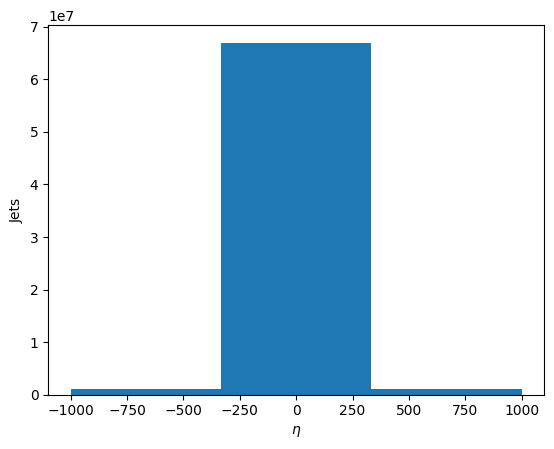

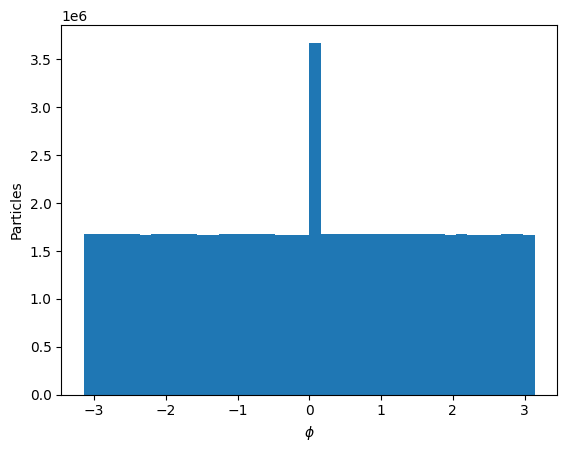

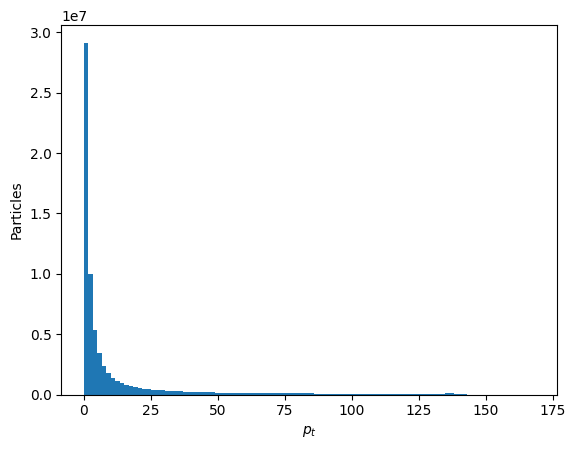

In [31]:
# Now we graph the distribution of the data
# First we'll do it with the Matplotlib library

plt.hist(eta_all, bins = 3)
plt.xlabel(r"$\eta$")
plt.ylabel("Jets")
plt.show()

plt.hist(phi_all, bins = 40)
plt.xlabel(r"$\phi$")
plt.ylabel("Particles")
plt.show()

plt.hist(pt_all, bins = 100)
plt.xlabel(r"$p_t$")
plt.ylabel("Particles")
plt.show()